# Problem Statement: Abalone Age Prediction

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df = pd.read_csv('abalone.csv')

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

# EDA

<AxesSubplot:>

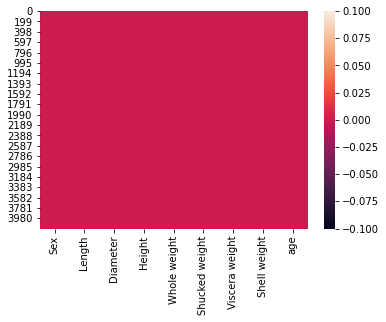

In [7]:
sns.heatmap(df.isnull())

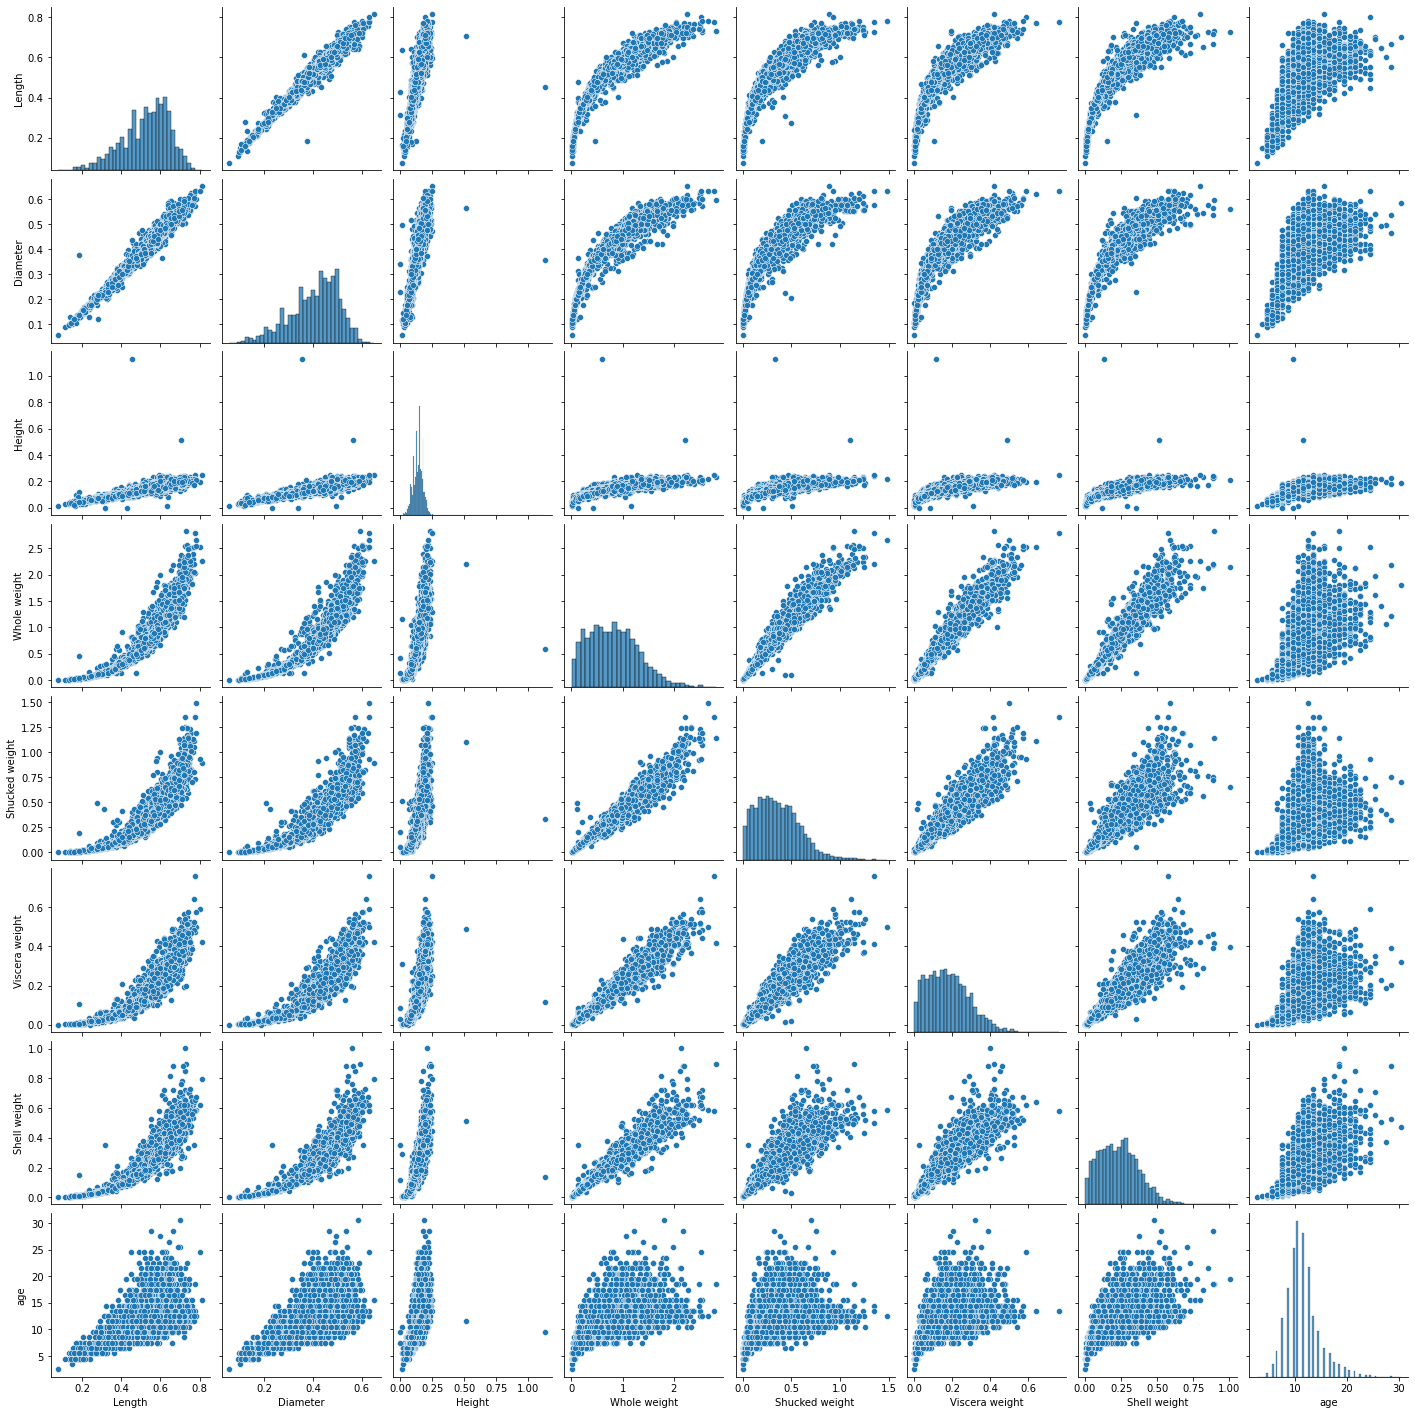

In [8]:
sns.pairplot(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [10]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

<ipython-input-10-8d4f0ec53b22>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include = [np.object]).columns


In [11]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [12]:
categorical_features

Index(['Sex'], dtype='object')

<AxesSubplot:>

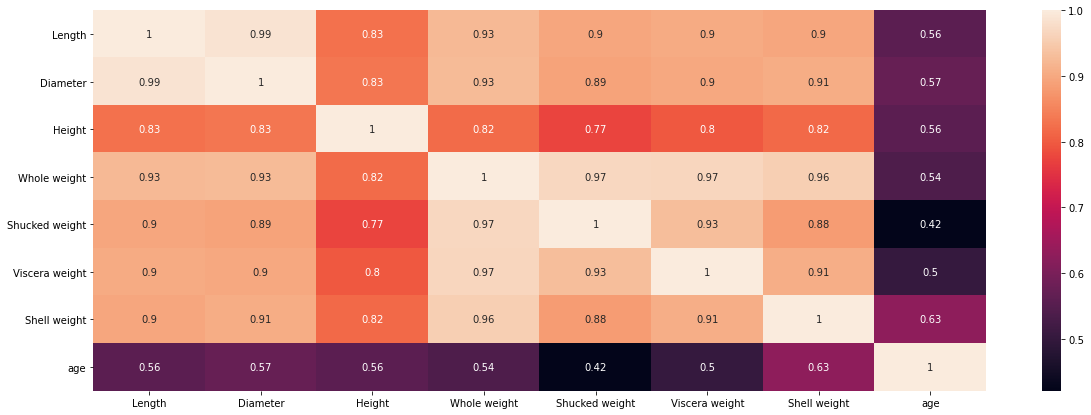

In [13]:
plt.figure(figsize = (20,7))
sns.heatmap(df[numerical_features].corr(),annot = True)

<AxesSubplot:xlabel='Sex', ylabel='count'>

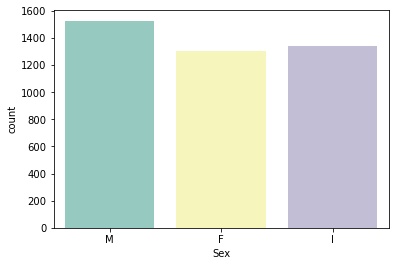

In [14]:
sns.countplot(x = 'Sex', data = df, palette = 'Set3')

C:\Users\Sanjeevan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sanjeevan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sanjeevan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='age'>

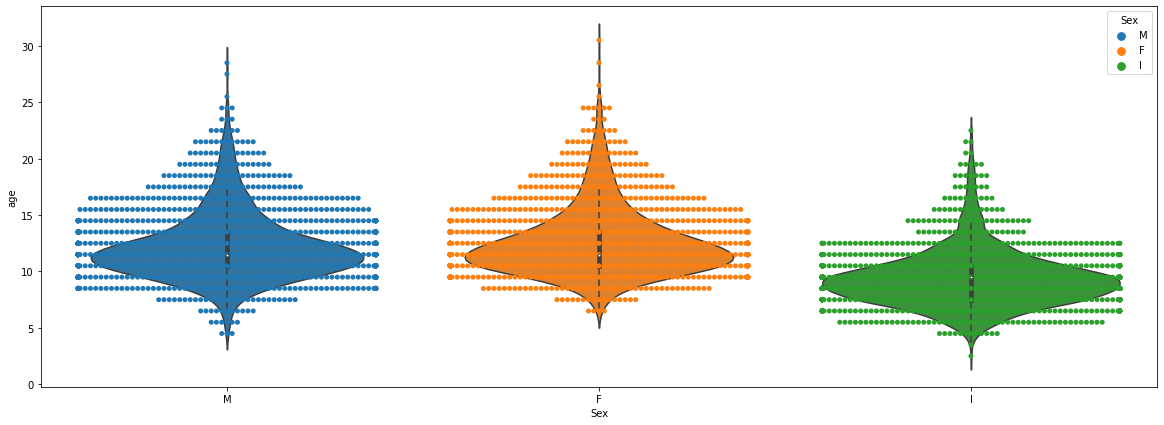

In [15]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age',data = df)

# Data Preprocessing

In [16]:
# outlier handling
df = pd.get_dummies(df)
dummy_df = df

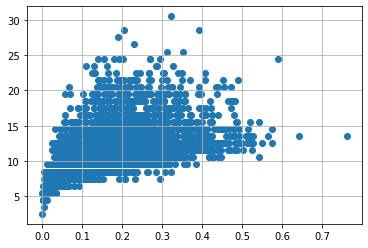

In [17]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [18]:
df.drop(df[(df['Viscera weight'] > 0.5) &
          (df['age'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<0.5) & (
df['age'] > 25)].index, inplace = True)

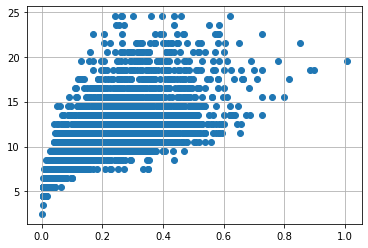

In [19]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [20]:
df.drop(df[(df['Shell weight'] > 0.6) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Shell weight']<0.8) & (
df['age'] > 25)].index, inplace = True)

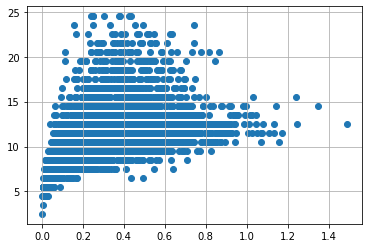

In [21]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [22]:
df.drop(df[(df['Shucked weight'] >= 1) &
          (df['age'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<1) & (
df['age'] > 20)].index, inplace = True)

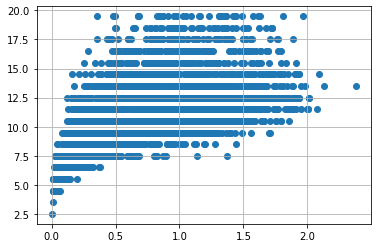

In [23]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [24]:
df.drop(df[(df['Whole weight'] >= 2.5) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (
df['age'] > 25)].index, inplace = True)

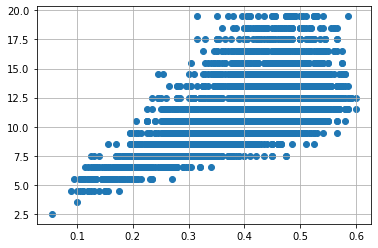

In [25]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [26]:
df.drop(df[(df['Diameter'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (
df['age'] < 25)].index, inplace = True)

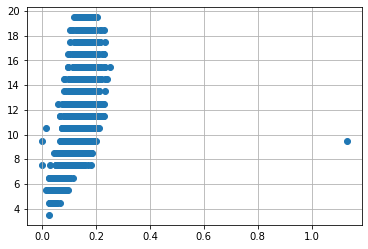

In [27]:
var = 'Height'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [28]:
df.drop(df[(df['Height'] > 0.4) &
          (df['age'] < 15)].index, inplace = True)
df.drop(df[(df['Height']<0.4) & (
df['age'] > 25)].index, inplace = True)

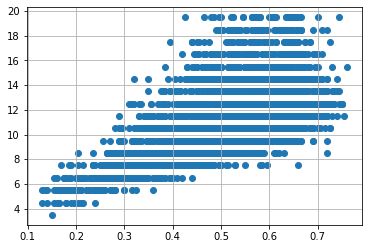

In [29]:
var = 'Length'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [30]:
df.drop(df[(df['Length'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (
df['age'] < 25)].index, inplace = True)

# Feature Selection and Standardization

In [31]:
X = df.drop('age', axis = 1)
y = df['age']

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

In [33]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)











# Model Selection

# 1)Linear regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)


In [37]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :3.585082
Mean Squared error of testing set :3.485909


In [38]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)


R2 Score of training set:0.53
R2 Score of testing set:0.54


# 2)Ridge

In [39]:
from sklearn.linear_model import Ridge


In [40]:
ridge_mod = Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(X_train, y_train)
ridge_mod.fit(X_test, y_test)
ridge_model_pred = ridge_mod.predict(X_test)
ridge_mod.score(X_train, y_train)

C:\Users\Sanjeevan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Sanjeevan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fr

0.5225862980922386

In [41]:
ridge_mod.score(X_test, y_test)

0.534969314125336

Text(0, 0.5, 'Predictions')

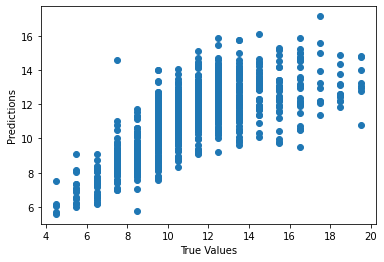

In [42]:
plt.scatter(y_test, ridge_model_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')


# 3)Support vector Regression

In [43]:
from sklearn.svm import SVR

In [44]:
# LINEAR KERNEL

svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
svr.fit(X_test, y_test)

SVR(kernel='linear')

In [45]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

svr.score(X_train, y_train)


0.44022701529257624

In [46]:

svr.score(X_test, y_test)

0.4666192036440733

# 4) RandomForestRegression

In [47]:
 from sklearn.ensemble import RandomForestRegressor


In [48]:
 regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)


In [49]:
regr.fit(X_train, y_train)
regr.fit(X_test, y_test)

RandomForestRegressor(max_depth=2, random_state=0)

In [50]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

regr.score(X_train, y_train)

0.4070237286341082

In [51]:
regr.score(X_test, y_test)

0.46746690440593397

# 5)Gradient Boosting Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr.fit(X_test, y_test)

GradientBoostingRegressor()

In [54]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)


regr.score(X_train, y_train)

0.4070237286341082

In [55]:
regr.score(X_test, y_test)

0.46746690440593397

# 6)KNeighborsRegressor

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
knn = KNeighborsRegressor(n_neighbors =4 )
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)

KNeighborsRegressor(n_neighbors=4)

In [58]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


knn.score(X_train, y_train)

0.4553296879492067

In [59]:
knn.score(X_test, y_test)

0.6854371529888308

# Hyperparameter Tunning Using GridSearchCV

In [60]:
# Hyperparameter Tuning using GridSearchCV

from sklearn.model_selection import  GridSearchCV
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
glrm0 = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
glrm0.fit(X_train, y_train)
glrm0.best_params_, glrm0.best_score_


({'alpha': 0.01, 'solver': 'saga'}, 0.5275212242828515)

In [61]:
ridge_mod = Ridge(alpha=0.001,solver = 'sag', random_state = 10, normalize=True)
ridge_mod.fit(X_train, y_train)
ridge_mod.fit(X_test, y_test)
ridge_model_pred = ridge_mod.predict(X_test)
ridge_mod.score(X_train, y_train)

C:\Users\Sanjeevan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Sanjeevan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fr

0.5272528057787556

In [62]:
ridge_mod.score(X_test, y_test)

0.5421057730066537

# Building a Regression Model

In [68]:
dd = pd.read_csv("abalone.csv")
dd.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [69]:
#unique Single column

dd['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [70]:
print(df.describe(include='all'))

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  3995.000000  3995.000000  3995.000000   3995.000000     3995.000000   
mean      0.518168     0.402955     0.136972      0.791814        0.345022   
std       0.117643     0.097127     0.037248      0.451790        0.205040   
min       0.130000     0.095000     0.000000      0.010500        0.004500   
25%       0.445000     0.345000     0.110000      0.428250        0.179250   
50%       0.535000     0.420000     0.140000      0.774500        0.326500   
75%       0.610000     0.475000     0.165000      1.123750        0.491500   
max       0.760000     0.590000     0.250000      2.381000        0.995500   

       Viscera weight  Shell weight          age        Sex_F        Sex_I  \
count     3995.000000   3995.000000  3995.000000  3995.000000  3995.000000   
mean         0.173504      0.227166    11.127284     0.307134     0.333917   
std          0.102633      0.125889     2.764955     0.461363  

# Perform Below Visualizations. 

## Univariate Analysis 

<AxesSubplot:>

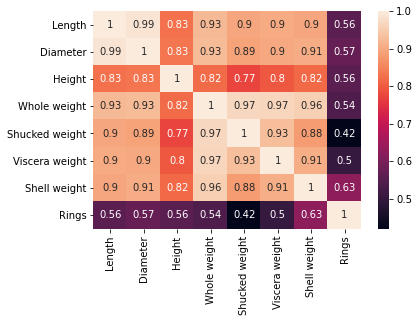

In [71]:
#Univariate Analysis
#Heatmap
sns.heatmap(dd.corr(),annot=True)

C:\Users\Sanjeevan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Rings'>

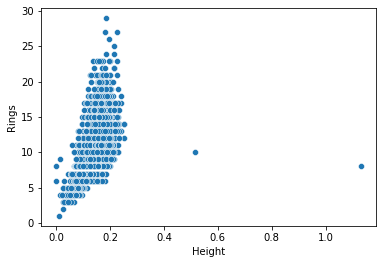

In [73]:
#Scatterplot
sns.scatterplot(dd['Height'],dd['Rings'])

C:\Users\Sanjeevan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

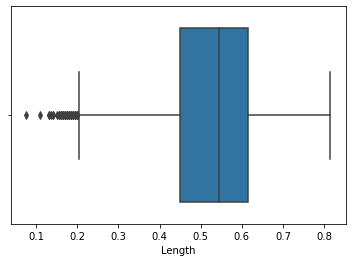

In [77]:
#boxplot
sns.boxplot(dd['Length'])

C:\Users\Sanjeevan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Rings'>

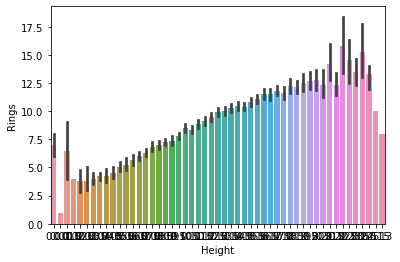

In [80]:
#barplot
sns.barplot(dd['Height'],dd['Rings'])

C:\Users\Sanjeevan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Rings'>

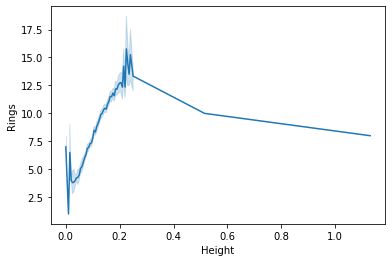

In [81]:
#barplot
sns.lineplot(dd['Height'],dd['Rings'])

C:\Users\Sanjeevan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

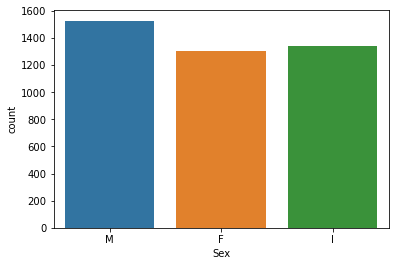

In [82]:
sns.countplot(dd['Sex'])

# Bivariate Analysis

In [83]:
#Bivariate Analysis
dd.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


C:\Users\Sanjeevan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100.0)

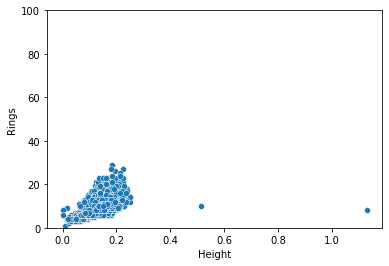

In [89]:
sns.scatterplot(dd['Height'],dd['Rings'])
plt.ylim(0,100)

<AxesSubplot:xlabel='Height', ylabel='count'>

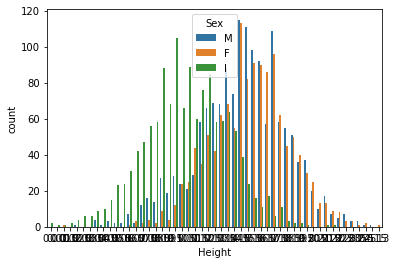

In [92]:
sns.countplot(data=dd,x='Height',hue='Sex')

# Multivariate Analysis

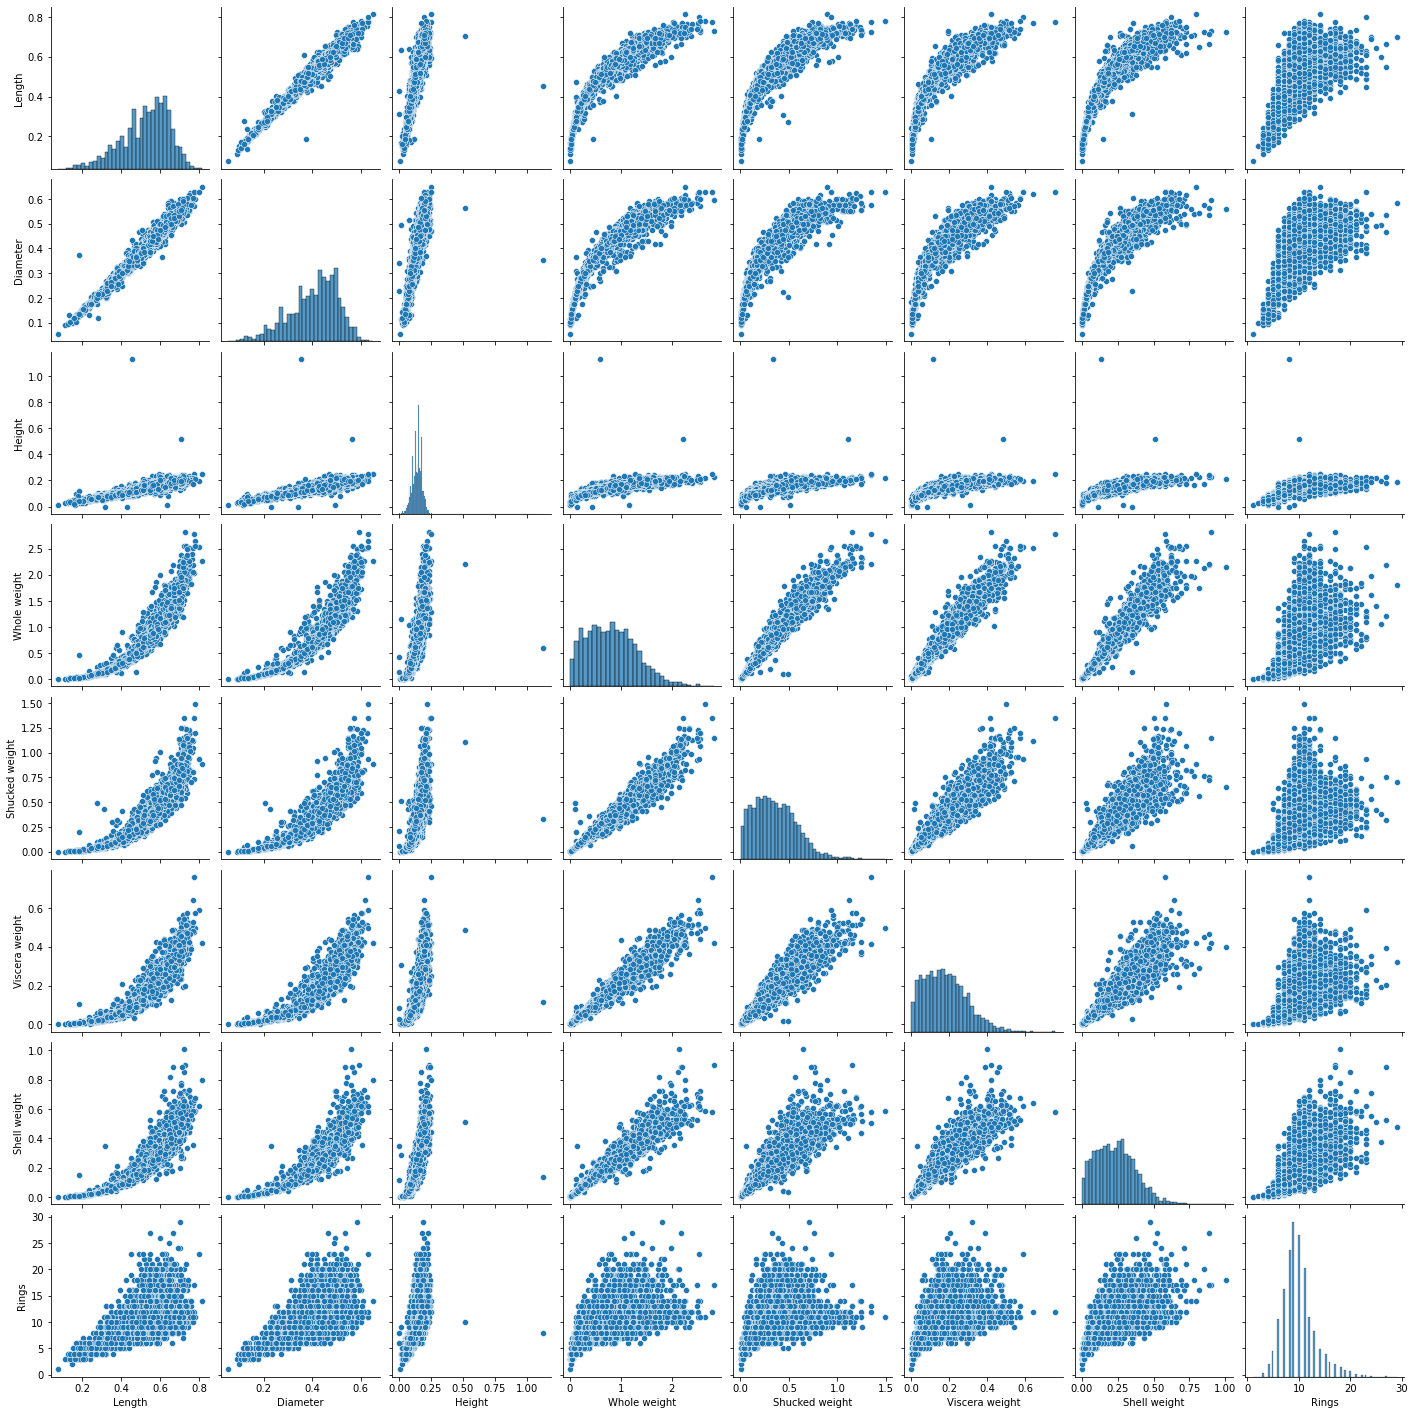

In [94]:
#multi -variate Analysis
sns.pairplot(data=dd[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']])

# Missing Values

In [97]:
#missing values
dd.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Find the outliers and replace the outliers

C:\Users\Sanjeevan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

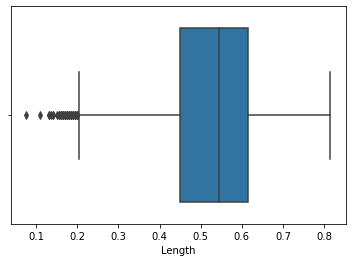

In [101]:
#find the outlier and replace the outliers
sns.boxplot(dd['Length'])

In [104]:
print(np.where(dd['Length']>0.2))

(array([   0,    1,    2, ..., 4174, 4175, 4176], dtype=int64),)


In [105]:
from scipy import stats
z = np.abs(stats.zscore(dd['Length']))
print(z)

[0.57455813 1.44898585 0.05003309 ... 0.6329849  0.84118198 1.54905203]


In [106]:
print(np.where(z>3))

(array([ 236,  237,  238,  239,  526,  696,  719,  720, 1429, 1986, 1987,
       2114, 2381, 3899, 3902], dtype=int64),)


In [108]:
#IQR
Q1 = np.percentile(df['Length'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['Length'], 75,interpolation = 'midpoint') 
IQR = Q3 - Q1 

In [109]:
upper = df['Length'] >= (Q3+1.5*IQR)
print("Upper bound:",upper)
print(np.where(upper))
# Below Lower bound
lower = df['Length'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
Name: Length, Length: 3995, dtype: bool
(array([], dtype=int64),)
Lower bound: 0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
Name: Length, Length: 3995, dtype: bool
(array([ 140,  141,  217,  218,  278,  289,  418,  471,  472,  553,  628,
        630,  652,  653,  654,  978,  979,  980, 1127, 1339, 1723, 1883,
       1884, 2006, 2007, 2058, 2060, 2217, 2240, 2249, 2250, 2568, 2989,
       3159, 3217, 3306, 3433, 3667, 3728, 3731, 3814], dtype=int64),)


# Categorical Columns

In [111]:
#Categorical columns
dd._get_numeric_data().columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [114]:
cols = dd.columns
print(cols)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [113]:
num_cols = dd._get_numeric_data()
num_cols

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [117]:
cat_cols = dd['Sex']

In [118]:
num_cols.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [119]:
cat_cols.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [120]:
print(dd['Sex'].unique())

['M' 'F' 'I']


# Perform encode the label using label encoding

In [122]:
#perfrom encode the label using label encoding
from sklearn.preprocessing import LabelEncoder
s_encoder = LabelEncoder()

In [124]:
s_encoder.fit(dd['Sex'])

LabelEncoder()

In [128]:
s_values = s_encoder.transform(cat_cols)

In [129]:

print("Before Encoding:", list(cat_cols[-10:]))
print("After Encoding:", s_values[-10:])
print("The inverse from the encoding result:", s_encoder.inverse_transform(s_values[-10:]))

Before Encoding: ['M', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'F', 'M']
After Encoding: [2 0 2 2 2 0 2 2 0 2]
The inverse from the encoding result: ['M' 'F' 'M' 'M' 'M' 'F' 'M' 'M' 'F' 'M']


# Spliting the Independent and Dependent Variable

In [159]:
#spliting the independent and dependent varible
#dependent variable
x = dd.iloc[:,1:2].values
#independent variable
y = dd.iloc[:,8:10].values
x

array([[0.455],
       [0.35 ],
       [0.53 ],
       ...,
       [0.6  ],
       [0.625],
       [0.71 ]])

In [132]:
#independent variable
y

array([[15],
       [ 7],
       [ 9],
       ...,
       [ 9],
       [10],
       [12]], dtype=int64)

# Scaling the Independent Variable

In [133]:
#Scaling the independent variable
from sklearn.preprocessing import StandardScaler

#Creating object of StandardScaler
scale=StandardScaler()

# Scale the independent variable data using sklearn StandardScaler
y = scale.fit_transform(y)
y

array([[ 1.57154357],
       [-0.91001299],
       [-0.28962385],
       ...,
       [-0.28962385],
       [ 0.02057072],
       [ 0.64095986]])

# Split the data intoTraining and Testing

In [207]:
#split the data into training and testing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
Y = Y.values.reshape((3995,1))

In [209]:
X_train.shape

(2796, 10)

In [210]:
Y_train.shape

(2796,)

In [211]:
X_test.shape

(1199, 10)

In [212]:
Y_test.shape

(1199,)

# Build and Train the Model

In [217]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [219]:
y_pred = lr.predict(X_test)
print(lr.coef_)

[ 3.03099901e-15 -5.30852539e-15 -5.11319954e-16  1.12219234e-15
 -2.82281633e-15 -4.57770896e-16  5.05685187e-16  7.24825795e-18
 -1.00000000e+00 -1.00000000e+00]


In [220]:
print(lr.intercept_)

1.0000000000000007


# Testing the Model

In [226]:
from sklearn import metrics
metrics.mean_absolute_error(Y_test,y_pred)

1.978771145641334e-16

In [227]:
#Mean squared Error(MSE)
metrics.mean_squared_error(Y_test, y_pred)

6.849692727647521e-32

In [228]:
#Root Mean Squared Error(RMSE)
np.sqrt(metrics.mean_squared_error(Y_test, y_pred))

2.6171917636366504e-16